#
1. Try Catch on timeout error
    Completed
2. Labels for graph
    Active
3. logic to take out nodes with a degree of less than 2
    Resolved - Can be done within Gephi

In [43]:
import requests
from bs4 import BeautifulSoup as soup
import networkx as nx
import matplotlib.pyplot as plt
#from google.colab import files
import json
import time

list_of_mathmeticians = ['Gottfried_Wilhelm_Leibniz',
                         'Leonhard_Euler',
                         'Euclid',
                         'Carl_Friedrich_Gauss',
                         'Isaac_Newton', 
                         'Bernhard_Riemann',
                         'Blaise_Pascal',
                         'Augustin-Louis_Cauchy',
                         'Joseph_Fourier',
                         'John_von_Neumann',
                         'Joseph-Louis_Lagrange',
                         'Alan_Turing',
                         'Georg_Cantor',
                         'Pierre_de_Fermat',
                         'Albert_Einstein',
                         'Pierre-Simon_Laplace',
                         'Srinivasa_Ramanujan',
                         'Archimedes',
                         'René_Descartes',
                         'Paul_Erdős',
                         'Jacob_Bernoulli',
                         'Évariste_Galois',
                         'Henri_Poincaré',
                         'John_Forbes_Nash_Jr.',
                         'William_Rowan_Hamilton']
                  


In [44]:
def link_generation(list_of_mathmeticians):
    '''
    Scraping
    '''
    
    
    links_dict = {}
    labels_dict = {}
    
    
    #Iterate through the list of mathmeticians
    for mathmetician in list_of_mathmeticians:
        try:
            #Call webpage and download html
            req = requests.get('https://en.wikipedia.org/wiki/{}'.format(mathmetician))
            page = soup(req.content, 'html.parser')
            
            #Filters out below the "See Also Section" on wikipedia
            page = soup(str(page)[:str(page).find('<h2><span class="mw-headline" id="See_also">')])


            '''
            Link Extraction
            '''
            #Extracts all a tags (hyperlinks)
            a_tags = page.find_all('a')

            #Extracts all the hyperlink references within the hyperlink tags
            links = []
            labels = []
            for link in a_tags:
                l = link.get('href')
                if l is not None:
                    if (l.find('/wiki/') == 0) and (l.find(':') == -1):
                        links.append(l[6:])
                        labels.append(link.text.title())
                 
       
            #Add link set to the dictionary
            links_dict[mathmetician] = links
            labels_dict[mathmetician] = dict(zip(links,labels))
            
            
        #Timeout / error handling    
        except requests.exceptions.RequestException as e: 
            time.sleep(.1)
            print(e)
            
    return(links_dict, labels_dict)


links_dict, labels_dict = link_generation(list_of_mathmeticians)


'''
Links within links
'''

# flagpoint = 0
# for mathmetician in list_of_mathmeticians:
#     for link in links_dict[mathmetician]:
#         try:
#             #Call webpage and download html
#             req = requests.get('https://en.wikipedia.org/wiki/{}'.format(link))
#             page = soup(req.content, 'html.parser')
#             page = soup(str(page)[:str(page).find('<h2><span class="mw-headline" id="See_also">')])
#           
#             if 'math' not in page.text.lower():
#                 links_dict[mathmetician].remove(link)
#                 flagpoint += 1
#                 if flagpoint % 10 == 0:
#                   print(mathmetician)
#                   print(link)
#                   print(len(links_dict[mathmetician]))
#                   print('\n')
#         except requests.exceptions.RequestException as e: 
#             time.sleep(.1)
#             print(e)





    

c:\users\jamespc\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\jamespc\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


'\nLinks within links\n'

In [45]:
#Combine all label dictionaries into one mapper
from collections import ChainMap
label_mapper = ChainMap(*list(labels_dict.values()))


c:\users\jamespc\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


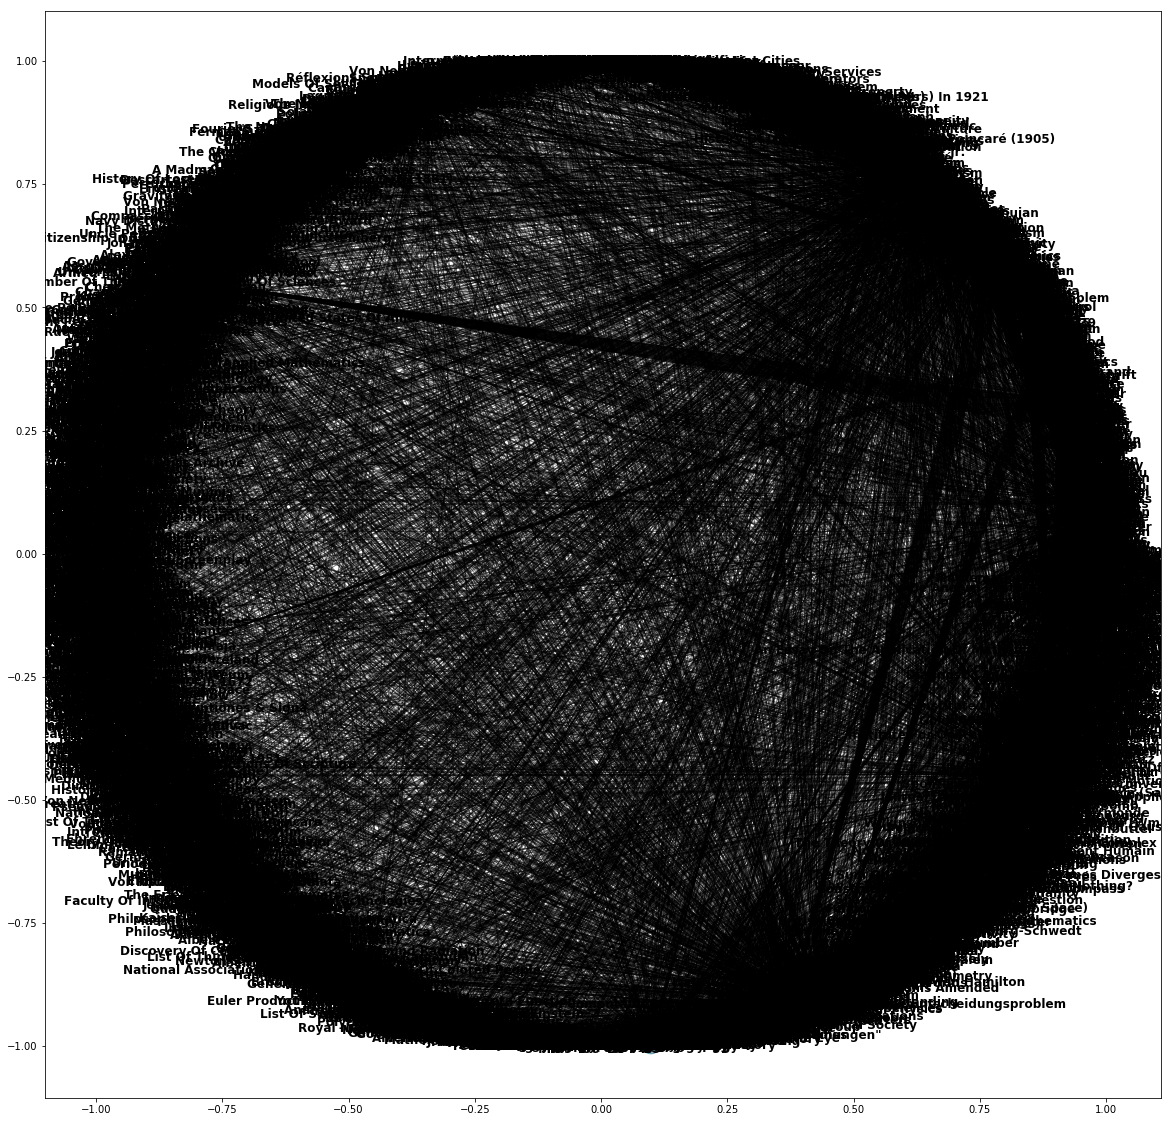

In [46]:

G = nx.Graph()

for i,mathmetician in enumerate(links_dict.keys()):
        
        #Adds links as nodes
        G.add_nodes_from(labels_dict[mathmetician].keys(), color = 'red')
        
 
        #Adds mathmeticians as nodes
        G.add_node(list_of_mathmeticians[i])
        
        
        #Adds edges between nodes
        G.add_edges_from(list(zip([list_of_mathmeticians[i]]*len(labels_dict[mathmetician]),\
                                  labels_dict[mathmetician].keys())))
       
# Relabing Nodes

nx.relabel_nodes(G, label_mapper, copy = False)

#Remove any nodes that are not connected to more than 1 node
for k,v in dict(G.degree()).items():
        #Remove nominal nodes
        if v < 0:
            G.remove_node(k)
        #Color map
        
'''
<color Maps>
'''  

import numpy as np
from sklearn.preprocessing import MinMaxScaler
#Set up Scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

#Define Data
data = np.array(list((dict(G.degree()).values()))).reshape(-1,1)

#Fit Scaler
scaler.fit(data)

#Alpha map of [0,1] values 
alpha_map = scaler.transform(data).ravel()

'''
</End Color maps>
'''



fig = plt.figure()
fig.set_size_inches(20, 20)
pos = nx.shell_layout(G)
options = {
    'node_color': 'black',
    'node_size': 150,
    'width': .5,
    'font_size': 12,
    'alpha': .6,
    'font_weight':'bold',
    #'with_labels':True,
    'node_color': list(alpha_map+5),
    #'node_color': range(len(G.nodes))),
    #'cmap': plt.cm.Blues
}
#nx.draw_shell(G, **options)

nx.draw_networkx_nodes(G, pos, alpha = .6, node_color = list(alpha_map), node_size = list(alpha_map*1000))
nx.draw_networkx_edges(G, pos, alpha = .5)

nx.draw_networkx_labels(G, pos, font_weight = 'bold', font_size = 12)
plt.savefig('Math_Graph.png')

nx.write_gexf(G, 'math_graph_gephi.gexf', encoding='utf-8', prettyprint=True, version='1.1draft') 